In [2]:
import pandas as pd

Problem Statement:Predicting the sales of products across stores of a retail chain

Loading the csv files

In [3]:
tdata=pd.read_csv('train.csv')
date_week_id=pd.read_csv('date_to_week_id_map.csv')
testdata=pd.read_csv('test_data.csv')
prices=pd.read_csv('product_prices.csv')

In [4]:
date_week_id.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [5]:
tdata.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [6]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395000 entries, 0 to 394999
Data columns (total 7 columns):
date                     395000 non-null object
product_identifier       395000 non-null int64
department_identifier    395000 non-null int64
category_of_product      395000 non-null object
outlet                   395000 non-null int64
state                    395000 non-null object
sales                    395000 non-null int64
dtypes: int64(4), object(3)
memory usage: 21.1+ MB


In [7]:
date_week_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
date       821 non-null object
week_id    821 non-null int64
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [8]:
tdata.product_identifier.nunique()

50

In [9]:
tdata.sales.value_counts()

0      246622
1       63068
2       31179
3       17115
4       10575
        ...  
293         1
85          1
84          1
241         1
242         1
Name: sales, Length: 126, dtype: int64

In [10]:
tdata.groupby(['category_of_product','product_identifier','department_identifier'])['sales'].sum()

category_of_product         product_identifier  department_identifier
drinks_and_food             1629                31                       62428
                            1672                31                       17192
                            1694                31                       12200
                            1727                31                        6915
                            1753                31                        6081
                            2294                33                       15548
                            2332                33                       17201
                            2492                33                       13186
                            2768                33                        4100
                            2794                33                        4847
                            2818                33                        3119
                            2853                33           

In [11]:
data=tdata.merge(date_week_id,on='date',how='left')
data.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id
0,2012-01-01,74,11,others,111,Maharashtra,0,49
1,2012-01-01,337,11,others,111,Maharashtra,1,49
2,2012-01-01,423,12,others,111,Maharashtra,0,49
3,2012-01-01,432,12,others,111,Maharashtra,0,49
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49


In [12]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 4 columns):
outlet                59000 non-null int64
product_identifier    59000 non-null int64
week_id               59000 non-null int64
sell_price            59000 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.8 MB


function to combine multiple columns into one column using  '_' 

In [13]:
cols = ['outlet', 'product_identifier','week_id']
prices['combined'] = prices[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
prices.head()

,outlet,product_identifier,week_id,sell_price,combined
0,111,74,49,2.94,111_74_49
1,111,74,50,2.94,111_74_50
2,111,74,51,2.94,111_74_51
3,111,74,52,2.94,111_74_52
4,111,74,53,2.94,111_74_53


In [14]:
cols = ['outlet', 'product_identifier','week_id']
data['combined'] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
data.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,combined
0,2012-01-01,74,11,others,111,Maharashtra,0,49,111_74_49
1,2012-01-01,337,11,others,111,Maharashtra,1,49,111_337_49
2,2012-01-01,423,12,others,111,Maharashtra,0,49,111_423_49
3,2012-01-01,432,12,others,111,Maharashtra,0,49,111_432_49
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,111_581_49


Merging the data

In [15]:
full_data=data.merge(prices,on='combined',how='left')
full_data.head()

,date,product_identifier_x,department_identifier,category_of_product,outlet_x,state,sales,week_id_x,combined,outlet_y,product_identifier_y,week_id_y,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,111_74_49,111,74,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,111_337_49,111,337,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,111_423_49,111,423,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,111_432_49,111,432,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,111_581_49,111,581,49,4.88


In [16]:
full_data.shape

(395000, 13)

In [17]:
#full_data[full_data['outlet_x']==full_data['outlet_y']]

So, while Merging additional columns are added(like:week_id_x,week_id_y) so better to remove those features.

In [18]:
full_data.drop(['outlet_x','week_id_x','product_identifier_x','combined'],axis=1,inplace=True)

In [19]:
full_data_train=full_data.rename(columns={"outlet_y": "outlet", "product_identifier_y": "product_identifier","week_id_y":"week_id"})
full_data_train.head()

,date,department_identifier,category_of_product,state,sales,outlet,product_identifier,week_id,sell_price
0,2012-01-01,11,others,Maharashtra,0,111,74,49,2.94
1,2012-01-01,11,others,Maharashtra,1,111,337,49,7.44
2,2012-01-01,12,others,Maharashtra,0,111,423,49,0.97
3,2012-01-01,12,others,Maharashtra,0,111,432,49,4.97
4,2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,581,49,4.88


In [20]:
testdata.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


Keep these test id's saparatly ..these will be helpful for submission file

In [21]:
test_id=testdata['id']

In [22]:
#testpreprocess
test=testdata.merge(date_week_id,on='date',how='left')
test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id
0,1,2014-03-01,74,11,others,111,Maharashtra,162
1,2,2014-03-01,337,11,others,111,Maharashtra,162
2,3,2014-03-01,423,12,others,111,Maharashtra,162
3,4,2014-03-01,432,12,others,111,Maharashtra,162
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162


In [23]:
cols = ['outlet', 'product_identifier','week_id']
test['combined'] = test[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,combined
0,1,2014-03-01,74,11,others,111,Maharashtra,162,111_74_162
1,2,2014-03-01,337,11,others,111,Maharashtra,162,111_337_162
2,3,2014-03-01,423,12,others,111,Maharashtra,162,111_423_162
3,4,2014-03-01,432,12,others,111,Maharashtra,162,111_432_162
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,111_581_162


In [24]:
full_data_test=test.merge(prices,on='combined',how='left')
full_data_test.head()

,id,date,product_identifier_x,department_identifier,category_of_product,outlet_x,state,week_id_x,combined,outlet_y,product_identifier_y,week_id_y,sell_price
0,1,2014-03-01,74,11,others,111,Maharashtra,162,111_74_162,111,74,162,3.43
1,2,2014-03-01,337,11,others,111,Maharashtra,162,111_337_162,111,337,162,7.78
2,3,2014-03-01,423,12,others,111,Maharashtra,162,111_423_162,111,423,162,0.97
3,4,2014-03-01,432,12,others,111,Maharashtra,162,111_432_162,111,432,162,4.97
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,111_581_162,111,581,162,4.88


In [25]:
full_data_test.drop(['outlet_x','week_id_x','product_identifier_x','combined'],axis=1,inplace=True)
full_data_test=full_data_test.rename(columns={"outlet_y": "outlet", "product_identifier_y": "product_identifier","week_id_y":"week_id"})
full_data_test.head()

,id,date,department_identifier,category_of_product,state,outlet,product_identifier,week_id,sell_price
0,1,2014-03-01,11,others,Maharashtra,111,74,162,3.43
1,2,2014-03-01,11,others,Maharashtra,111,337,162,7.78
2,3,2014-03-01,12,others,Maharashtra,111,423,162,0.97
3,4,2014-03-01,12,others,Maharashtra,111,432,162,4.97
4,5,2014-03-01,21,fast_moving_consumer_goods,Maharashtra,111,581,162,4.88


In [27]:
full_data_train.isna().sum()

date                     0
department_identifier    0
category_of_product      0
state                    0
sales                    0
outlet                   0
product_identifier       0
week_id                  0
sell_price               0
dtype: int64

In [28]:
full_data_test.isna().sum()

id                       0
date                     0
department_identifier    0
category_of_product      0
state                    0
outlet                   0
product_identifier       0
week_id                  0
sell_price               0
dtype: int64

Converting date to datetime pattern ..to retrieve day,month,year,dayofweek,quater

In [28]:
full_data_train['date']=pd.to_datetime(full_data_train['date'])
full_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
date                     395000 non-null datetime64[ns]
department_identifier    395000 non-null int64
category_of_product      395000 non-null object
state                    395000 non-null object
sales                    395000 non-null int64
outlet                   395000 non-null int64
product_identifier       395000 non-null int64
week_id                  395000 non-null int64
sell_price               395000 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 30.1+ MB


In [29]:
full_data_train['month']=full_data_train['date'].dt.month
full_data_train['day']=full_data_train['date'].dt.day
full_data_train['dayofweek']=full_data_train['date'].dt.dayofweek
full_data_train['year']=full_data_train['date'].dt.year
full_data_train['quarter']=full_data_train['date'].dt.quarter
full_data_train.head()

,date,department_identifier,category_of_product,state,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter
0,2012-01-01,11,others,Maharashtra,0,111,74,49,2.94,1,1,6,2012,1
1,2012-01-01,11,others,Maharashtra,1,111,337,49,7.44,1,1,6,2012,1
2,2012-01-01,12,others,Maharashtra,0,111,423,49,0.97,1,1,6,2012,1
3,2012-01-01,12,others,Maharashtra,0,111,432,49,4.97,1,1,6,2012,1
4,2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,581,49,4.88,1,1,6,2012,1


Don't distrub the original copy better to maintain saparate copy

In [30]:
train=full_data_train.copy()

grouping the ['category_of_product','state','outlet'] to know hwo many sales happening in state,outlet,product catogory

In [31]:
train.groupby(['category_of_product','state','outlet']).size()

category_of_product         state        outlet
drinks_and_food             Kerala       331       13430
                                         332       13430
                                         333       13430
                            Maharashtra  111       13430
                                         112       13430
                                         113       13430
                                         114       13430
                            Telangana    221       13430
                                         222       13430
                                         223       13430
fast_moving_consumer_goods  Kerala       331       22910
                                         332       22910
                                         333       22910
                            Maharashtra  111       22910
                                         112       22910
                                         113       22910
                                        

# Visualization

In [32]:
# Correlation with heat map
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

 Observation: department_identifier , product identifier  and week_id ,year and month , quater correlated to eachother

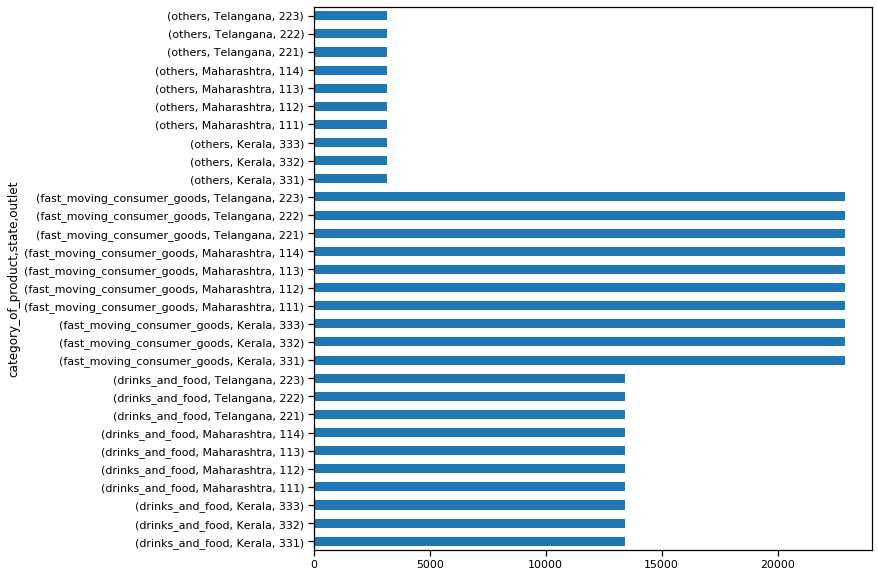

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
train.groupby(['category_of_product','state','outlet']).size().plot(kind='barh')
#full_data.groupby(['education','personal_loan']).size().plot(kind='bar')

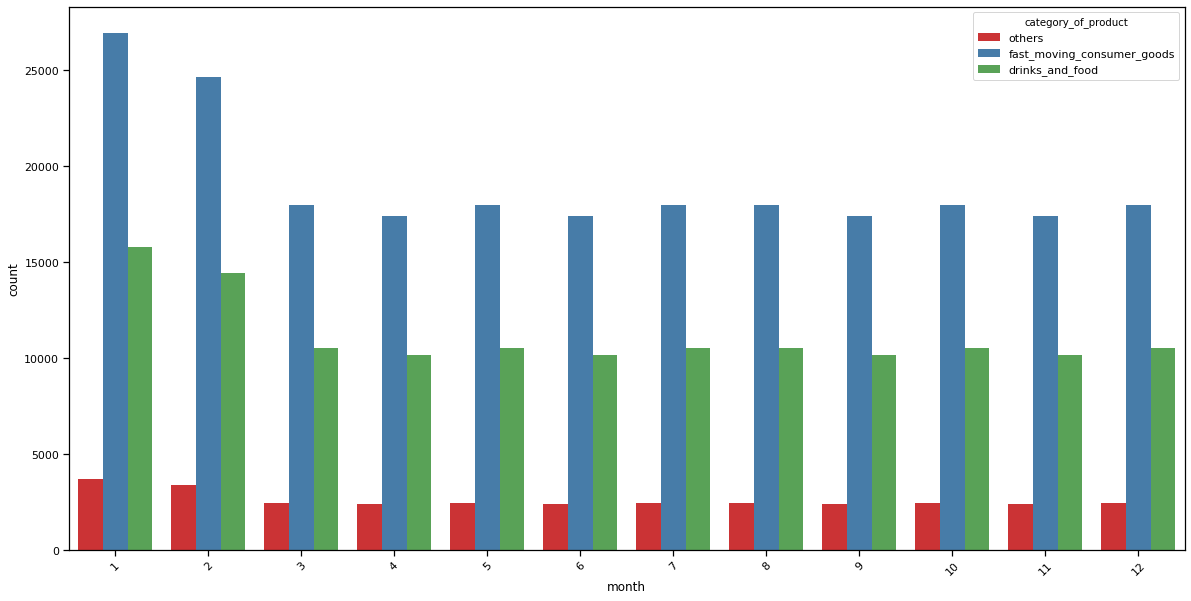

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=full_data_train,
    x='month',
    hue='category_of_product',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

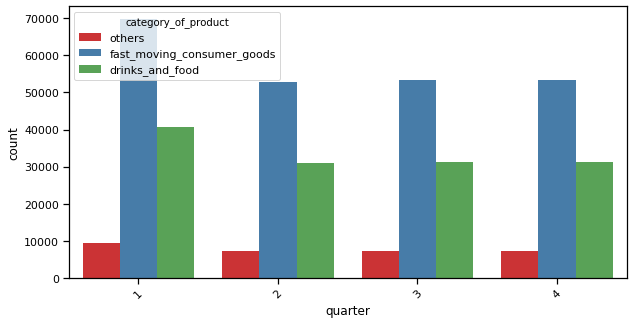

In [330]:

plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=full_data_train,
    x='quarter',
    hue='category_of_product',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

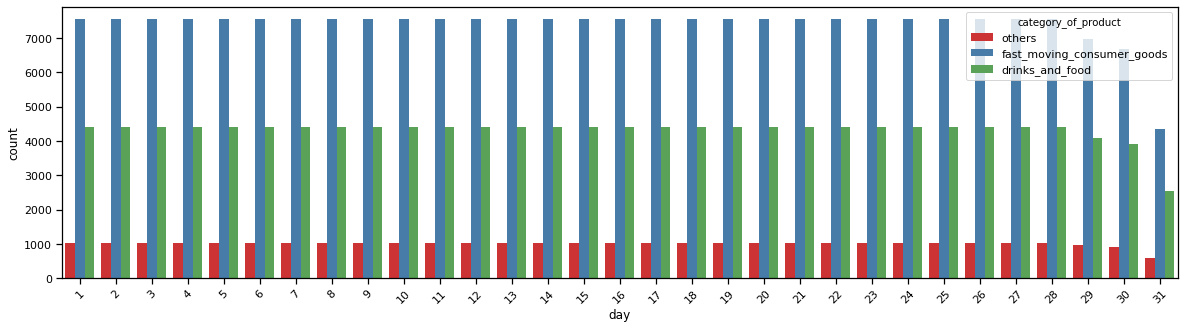

In [331]:
plt.figure(figsize=(20,5))
chart = sns.countplot(
    data=full_data_train,
    x='day',
    hue='category_of_product',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


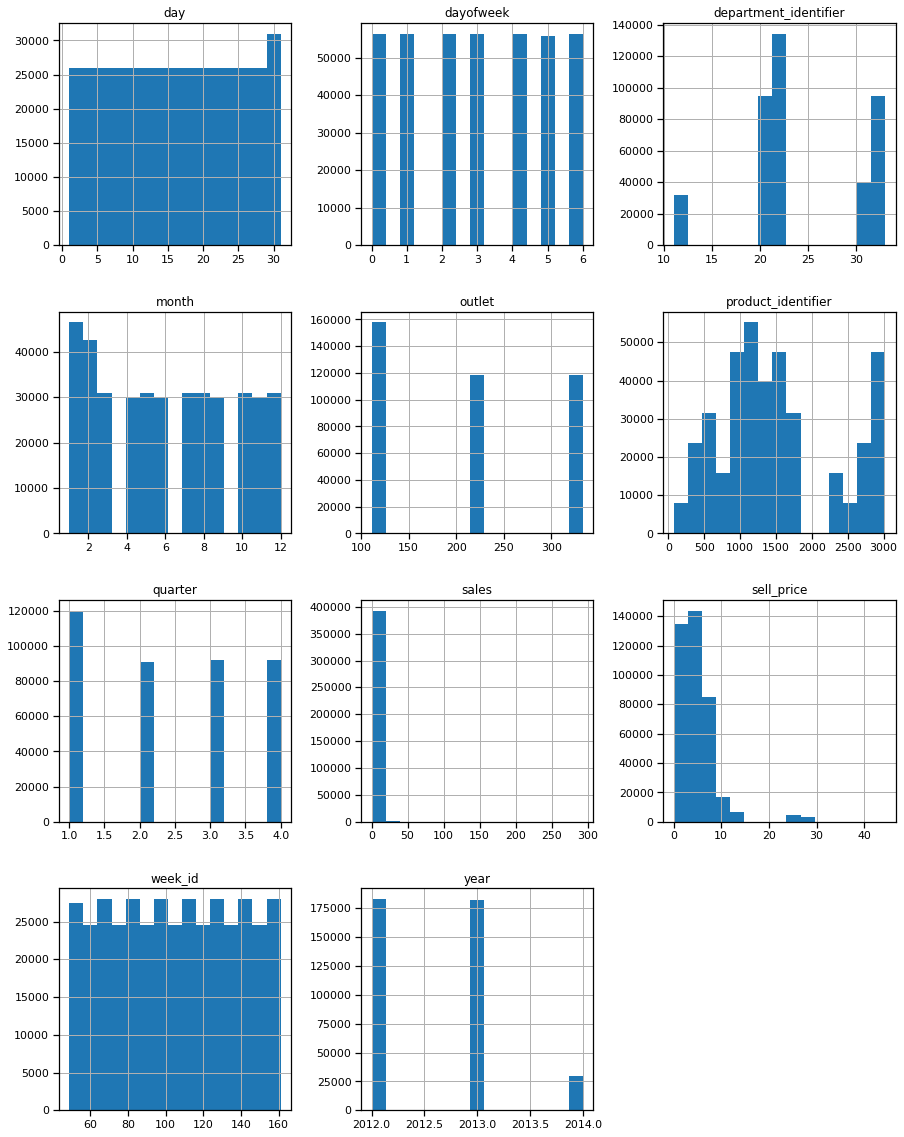

In [332]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
full_data_train.hist(ax = ax, bins = 15)
plt.show()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Observation: In our target variable we have skewness to one side....

department_identifier       AxesSubplot(0.125,0.657941;0.110714x0.222059)
sales                    AxesSubplot(0.257857,0.657941;0.110714x0.222059)
outlet                   AxesSubplot(0.390714,0.657941;0.110714x0.222059)
product_identifier       AxesSubplot(0.523571,0.657941;0.110714x0.222059)
week_id                  AxesSubplot(0.656429,0.657941;0.110714x0.222059)
sell_price               AxesSubplot(0.789286,0.657941;0.110714x0.222059)
month                       AxesSubplot(0.125,0.391471;0.110714x0.222059)
day                      AxesSubplot(0.257857,0.391471;0.110714x0.222059)
dayofweek                AxesSubplot(0.390714,0.391471;0.110714x0.222059)
year                     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
quarter                  AxesSubplot(0.656429,0.391471;0.110714x0.222059)
dtype: object

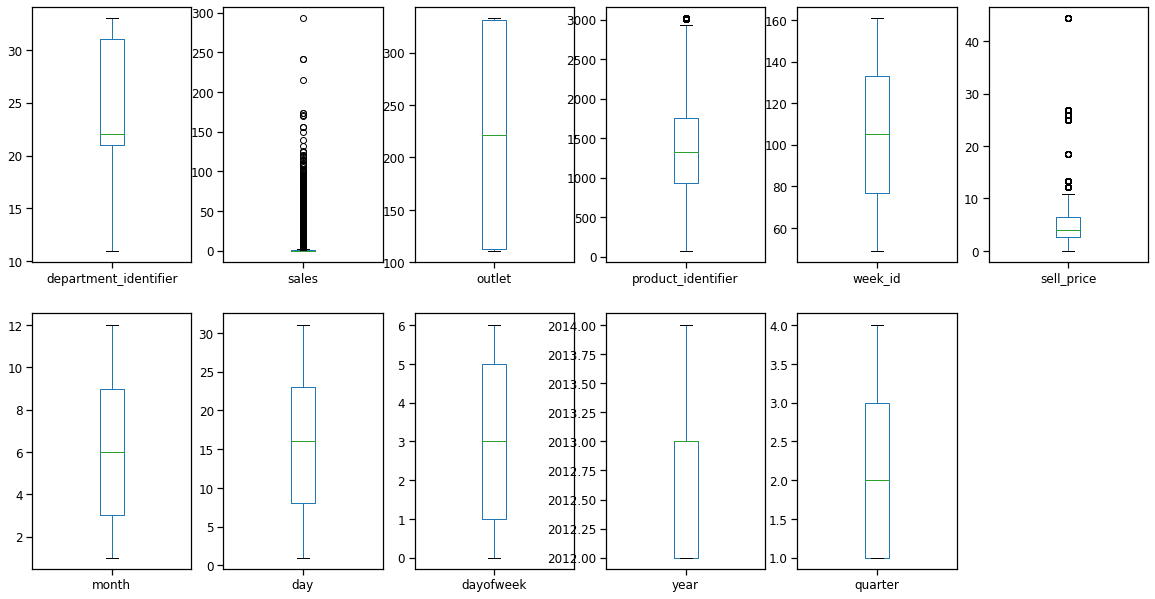

In [333]:
full_data_train.drop('date',axis=1).plot(kind='box',layout=(3,6),subplots=1,figsize=(20,16))

Observation: we have more number of outliers in sales i.e our target variable

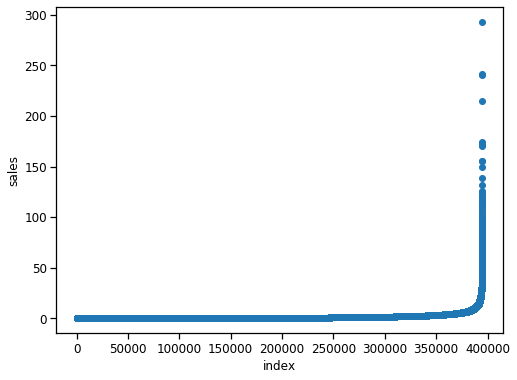

In [334]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.sales.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('sales', fontsize=12)
plt.show()

Data is negatively skewed, so we need to transform the data and we also see some outliers

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


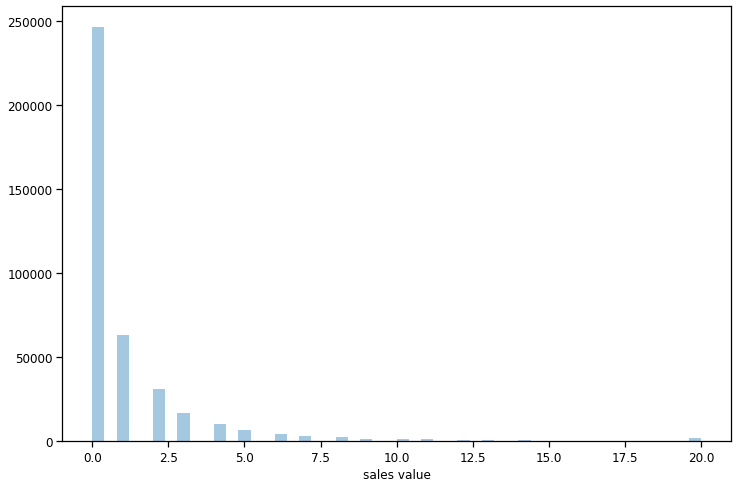

In [335]:
ulimit = 20
train['sales'].ix[train['sales']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(train.sales.values, bins=50, kde=False)
plt.xlabel('sales value', fontsize=12)
plt.show()

strip plots

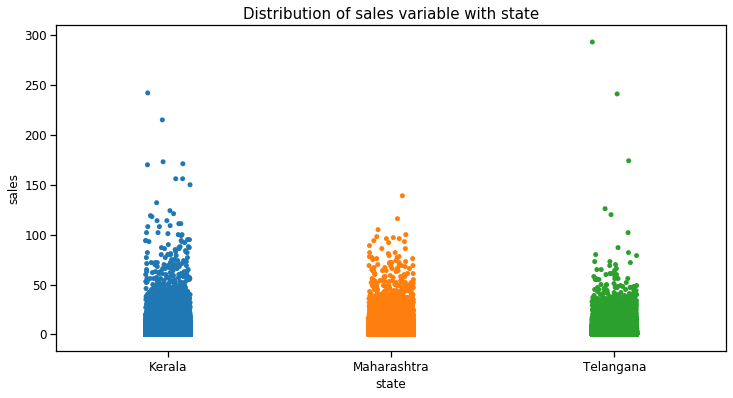

In [336]:
var_name = "state"
col_order = np.sort(full_data_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='sales', data=full_data_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('sales', fontsize=12)
plt.title("Distribution of sales variable with "+var_name, fontsize=15)
plt.show()
#to check the which state has more outleries and the mean ,num of sales

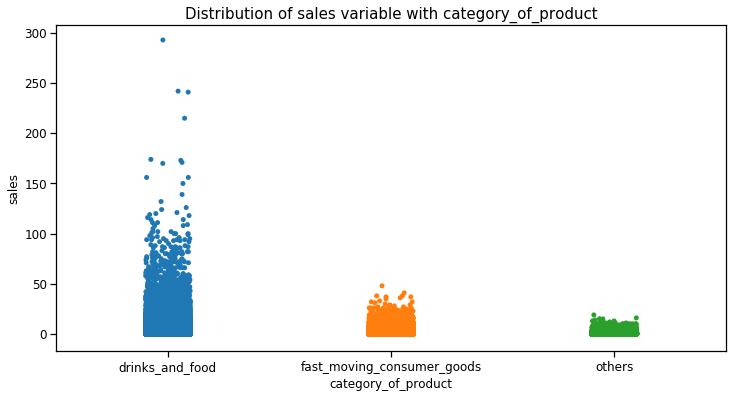

In [337]:
var_name = "category_of_product"
col_order = np.sort(full_data_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='sales', data=full_data_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('sales', fontsize=12)
plt.title("Distribution of sales variable with "+var_name, fontsize=15)
plt.show()
#which type of products sold more

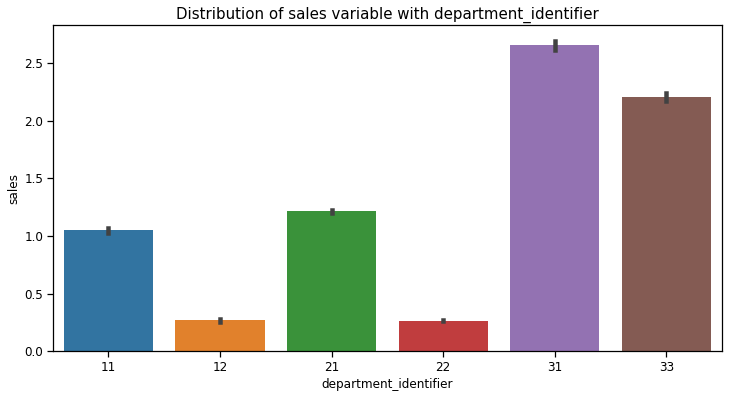

In [338]:
var_name = "department_identifier"
col_order = np.sort(full_data_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.barplot(x=var_name, y='sales', data=full_data_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('sales', fontsize=12)
plt.title("Distribution of sales variable with "+var_name, fontsize=15)
plt.show()
#which department has more sales

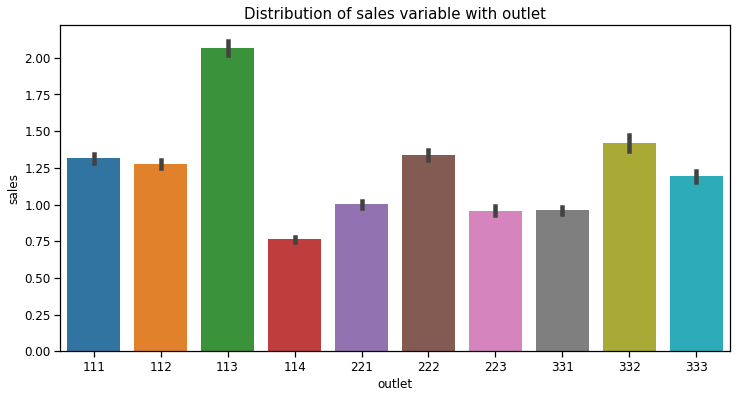

In [339]:
var_name = "outlet"
col_order = np.sort(full_data_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.barplot(x=var_name, y='sales', data=full_data_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('sales', fontsize=12)
plt.title("Distribution of sales variable with "+var_name, fontsize=15)
plt.show()
#from wich outlet there are more stable

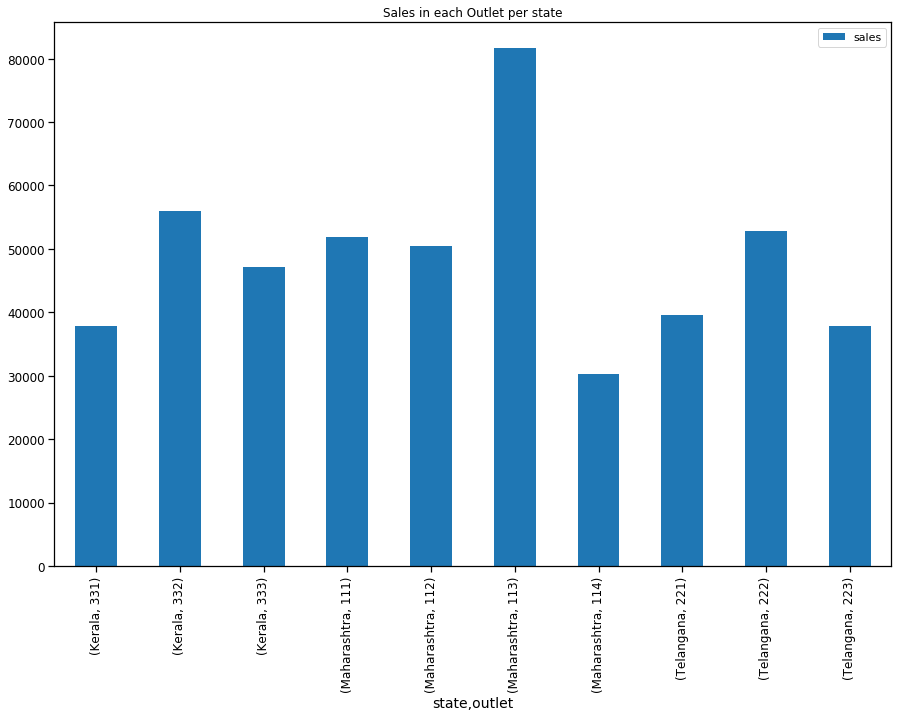

In [340]:
st_out=full_data_train.groupby(['state','outlet']).agg({"sales":"sum"})
st_out.plot(kind='bar',figsize=(15,10))
plt.title('Sales in each Outlet per state')
plt.show()
#for each state and  outlet, we can see that where there are high sales...

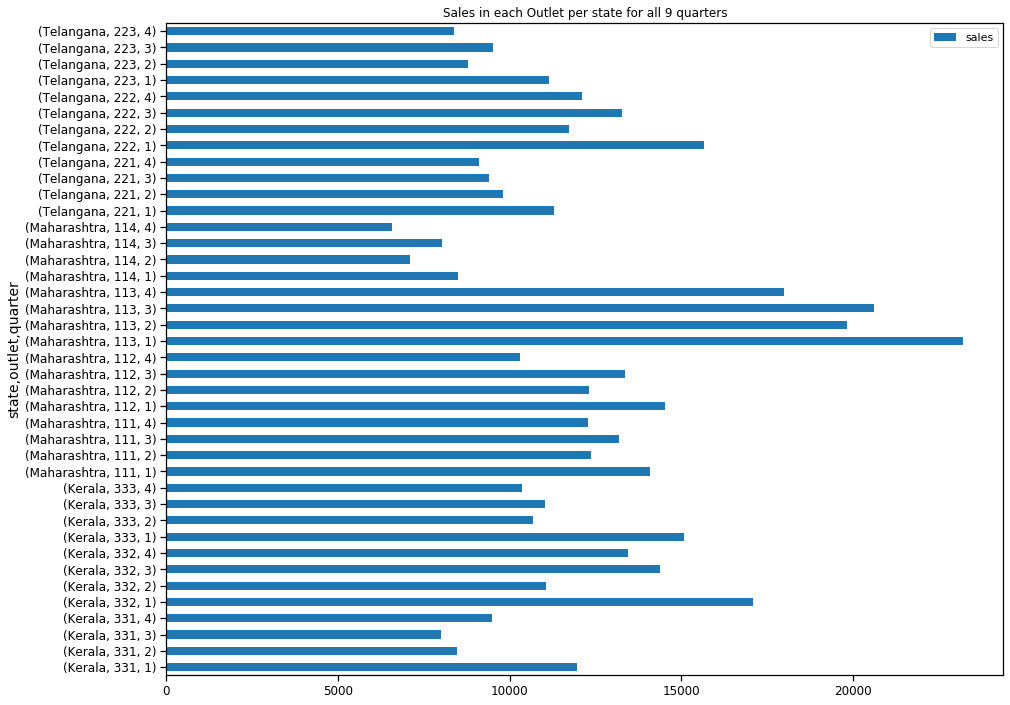

In [341]:
st_out=full_data_train.groupby(['state','outlet','quarter']).agg({"sales":"sum"})
st_out.plot(kind='barh',figsize=(15,12))
plt.title('Sales in each Outlet per state for all 9 quarters')
plt.show()

In [34]:
train.category_of_product.unique()

array(['others', 'fast_moving_consumer_goods', 'drinks_and_food'],
      dtype=object)

# Dummification

In [55]:
data.head()

,department_identifier,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter
date,,,,,,,,,,,
2012-01-01,24.46,1.308,211.2,1509.96,49.0,4.94466,1.0,1.0,6.0,2012.0,1.0
2012-01-02,24.46,1.720,211.2,1509.96,49.0,4.94466,1.0,2.0,0.0,2012.0,1.0
2012-01-03,24.46,1.242,211.2,1509.96,49.0,4.94466,1.0,3.0,1.0,2012.0,1.0
2012-01-04,24.46,1.394,211.2,1509.96,49.0,4.94466,1.0,4.0,2.0,2012.0,1.0
2012-01-05,24.46,1.364,211.2,1509.96,49.0,4.94466,1.0,5.0,3.0,2012.0,1.0


In [35]:
train = pd.get_dummies(data=train, columns=['category_of_product', 'state'], drop_first=True)
train.head()

,date,department_identifier,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Maharashtra,state_Telangana
0,2012-01-01,11,0,111,74,49,2.94,1,1,6,2012,1,0,1,1,0
1,2012-01-01,11,1,111,337,49,7.44,1,1,6,2012,1,0,1,1,0
2,2012-01-01,12,0,111,423,49,0.97,1,1,6,2012,1,0,1,1,0
3,2012-01-01,12,0,111,432,49,4.97,1,1,6,2012,1,0,1,1,0
4,2012-01-01,21,0,111,581,49,4.88,1,1,6,2012,1,1,0,1,0


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 16 columns):
date                                              395000 non-null datetime64[ns]
department_identifier                             395000 non-null int64
sales                                             395000 non-null int64
outlet                                            395000 non-null int64
product_identifier                                395000 non-null int64
week_id                                           395000 non-null int64
sell_price                                        395000 non-null float64
month                                             395000 non-null int64
day                                               395000 non-null int64
dayofweek                                         395000 non-null int64
year                                              395000 non-null int64
quarter                                           395000 non-null int64
category_of_pr

Droping date column model doesn't accept datetime variable.already we have retrievd day,month,year,dayofweek,quarter

In [345]:
train.drop(['date'],axis=1,inplace=True)

In [346]:
train_scale=train.copy()

In [347]:
train_sqrt=train.copy()

In [348]:
train_drop=train.copy()

In [349]:
col=['product_identifier','year','month']
train_drop.drop(col,axis=1,inplace=True)
#after removing variables 
from sklearn.model_selection import train_test_split
X = train_drop.copy().drop("sales",axis=1)
y = train_drop["sales"]

## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train_drop, X_valid_drop, y_train_drop, y_valid_drop = train_test_split(X, y, test_size=0.20)

## Print the shape of X_train, X_test, y_train, y_test
print(X_train_drop.shape)
print(X_valid_drop.shape)
print(y_train_drop.shape)
print(y_valid_drop.shape)

(316000, 11)
(79000, 11)
(316000,)
(79000,)


Method1:our target variables has outliers so ..i applied transformation (sqrt).to get our data to normally distrubuted

In [350]:
train_sqrt['sales']=np.sqrt(train_sqrt['sales'])
#due to skewness in the data we transform the data sqrt
from sklearn.model_selection import train_test_split
X = train_sqrt.copy().drop("sales",axis=1)
y = train_sqrt["sales"]

## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train_sqrt, X_valid_sqrt, y_train_sqrt, y_valid_sqrt = train_test_split(X, y, test_size=0.20)

## Print the shape of X_train, X_test, y_train, y_test
print(X_train_sqrt.shape)
print(X_valid_sqrt.shape)
print(y_train_sqrt.shape)
print(y_valid_sqrt.shape)

(316000, 14)
(79000, 14)
(316000,)
(79000,)


# Scaling

In [351]:
#for scaling purpose
num_col=['sales','sell_price']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_scale[num_col])
train_scale[num_col] = scaler.transform(train_scale[num_col])
train_scale.head()

,department_identifier,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Maharashtra,state_Telangana
0,11,-0.444834,111,74,49,-0.528501,1,1,6,2012,1,0,1,1,0
1,11,-0.059380,111,337,49,0.632958,1,1,6,2012,1,0,1,1,0
2,12,-0.444834,111,423,49,-1.036961,1,1,6,2012,1,0,1,1,0
3,12,-0.444834,111,432,49,-0.004554,1,1,6,2012,1,0,1,1,0
4,21,-0.444834,111,581,49,-0.027783,1,1,6,2012,1,1,0,1,0


# Scaling splitting

In [352]:
from sklearn.model_selection import train_test_split
X = train_scale.copy().drop("sales",axis=1)
y = train_scale["sales"]

## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train_scale, X_valid_scale, y_train_scale, y_valid_scale = train_test_split(X, y, test_size=0.20)

## Print the shape of X_train, X_test, y_train, y_test
print(X_train_scale.shape)
print(X_valid_scale.shape)
print(y_train_scale.shape)
print(y_valid_scale.shape)

(316000, 14)
(79000, 14)
(316000,)
(79000,)


# without removing outliers on target

In [353]:
from sklearn.model_selection import train_test_split
X = train.copy().drop("sales",axis=1)
y = train["sales"]

## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train_reg, X_valid_reg, y_train_reg, y_valid_reg = train_test_split(X, y, test_size=0.20)

## Print the shape of X_train, X_test, y_train, y_test
print(X_train_reg.shape)
print(X_valid_reg.shape)
print(y_train_reg.shape)
print(y_valid_reg.shape)

(316000, 14)
(79000, 14)
(316000,)
(79000,)


# Clipped outliers on the y target

In [354]:
#removing outliers on this y target
from sklearn.model_selection import train_test_split
X = train.copy().drop("sales",axis=1)
y = train["sales"]

## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20)

## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(316000, 14)
(79000, 14)
(316000,)
(79000,)


In [355]:
y_train=pd.DataFrame(y_train)
y_valid=pd.DataFrame(y_valid)
y_train_drop=pd.DataFrame(y_train_drop)
y_valid_drop=pd.DataFrame(y_valid_drop)

# Handling outliers

In [356]:
def getUpperLowerQuantiles(data) :
    LowerQuantile=[]
    UpperQuantile=[]
    num_cols=data.select_dtypes(include=['int64','float64']).columns
    print(num_cols)
    for i in num_cols:
        LowerQuantile.append(data[i].quantile(.01))
        UpperQuantile.append(data[i].quantile(.99))
    return(LowerQuantile,UpperQuantile)

In [357]:
LowerQuantile,UpperQuantile=list(getUpperLowerQuantiles(y_train))

Index(['sales'], dtype='object')


In [358]:
LowerQuantile

[0.0]

In [359]:
UpperQuantile

[14.0]

In [360]:
def getOutliers(data) :
    for i in range(data.shape[1]):
        print("--------------")
        print(data.iloc[:,i][data.iloc[:,i]>UpperQuantile[i]])
        print(data.iloc[:,i][data.iloc[:,i]<LowerQuantile[i]])

In [361]:
getOutliers(y_train)

--------------
321183    17
357846    18
178788    20
348946    18
153996    20
          ..
91613     20
31446     20
50046     19
121613    15
363946    20
Name: sales, Length: 2992, dtype: int64
Series([], Name: sales, dtype: int64)


# example for clip function

In [362]:
df = pd.DataFrame({"A":[-5, 8, 12, -9, 5, 3], 
                   "B":[-1, -4, 6, 4, 11, 3], 
                   "C":[11, 4, -8, 7, 3, -2]})
df

,A,B,C
0,-5,-1,11
1,8,-4,4
2,12,6,-8
3,-9,4,7
4,5,11,3
5,3,3,-2


Now trim all the values below -4 to -4 and all the values above 9 to 9. Values in-between -4 and 9 remaining the same.

In [363]:
# Clip in range (-4, 9) 
df.clip(-4, 9) 

,A,B,C
0,-4,-1,9
1,8,-4,4
2,9,6,-4
3,-4,4,7
4,5,9,3
5,3,3,-2


In [364]:
def clip_outliers(data):
    data.clip(lower=LowerQuantile, axis=1, inplace=True)
    data.clip(upper=UpperQuantile, axis=1, inplace=True)

In [365]:
clip_outliers(y_train)
clip_outliers(y_train_drop)

In [366]:
getOutliers(y_train)

--------------
Series([], Name: sales, dtype: int64)
Series([], Name: sales, dtype: int64)


In [367]:
clip_outliers(y_valid)
clip_outliers(y_valid_drop)

In [368]:
getOutliers(y_valid)

--------------
Series([], Name: sales, dtype: int64)
Series([], Name: sales, dtype: int64)


In [369]:
y_valid

,sales
233014,0
377607,1
372007,0
343241,0
164970,0
...,...
131186,1
331703,0
205866,1
131004,1


In [370]:
y_valid.shape

(79000, 1)

# Function for SSE,RMSE,MAE

In [371]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
def ErrorMetrics(train_y,train_pred,val_y,val_pred):
    print("-----Train Error------")
    print("SSE:", mean_squared_error(train_y, train_pred))
    print("RMSE:", np.sqrt(mean_squared_error(train_y, train_pred)))
    print("MAE:", mean_absolute_error(train_y, train_pred))
    
    print("-----Validation Error------")
    print("SSE:", mean_squared_error(val_y, val_pred))
    print("RMSE:", np.sqrt(mean_squared_error(val_y, val_pred)))
    print("MAE:", mean_absolute_error(val_y, val_pred))

# Models with Clipped outliers on y

In [252]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [253]:
y_pred_train=reg.predict(X_train)
y_pred_valid=reg.predict(X_valid)

In [254]:
ErrorMetrics(y_train,y_pred_train,y_valid,y_pred_valid)

-----Train Error------
SSE: 4.759480935127324
RMSE: 2.181623463186836
MAE: 1.3364759806832642
-----Validation Error------
SSE: 4.60044479054446
RMSE: 2.144864748776589
MAE: 1.3190716633991646


In [70]:
 r2_score(y_valid, y_pred_valid) 

0.12340630813271225

([1.3051486238819425,
  1.323721868210067,
  1.3286744217343405,
  1.332086387990797,
  1.3376696054680521,
  1.3390256533786649,
  1.3395704233322454,
  1.340260622329359,
  1.3382714998258283,
  1.3364759806832642],
 [1.3113198402532862,
  1.3151127716583957,
  1.3166256386403843,
  1.3171522016511483,
  1.3189400441663524,
  1.3198216860880758,
  1.3196174884896168,
  1.3200861406000641,
  1.3193320563084754,
  1.3190716633991646])

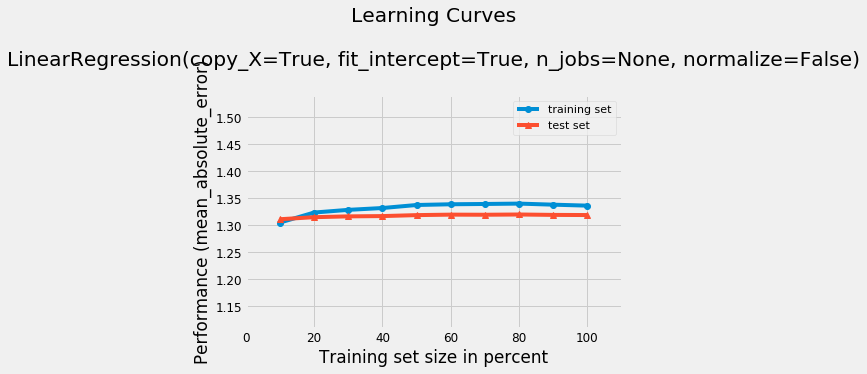

In [261]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_valid, y_valid, reg, scoring='mean_absolute_error')

Linear_Regression Using CV

In [372]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
lm=LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv = 5) 
print(scores, np.mean(scores), np.std(scores))
predictions = cross_val_predict(lm, X_valid, y_valid, cv = 5) 
accuracy = r2_score(y_valid, predictions) 
print(accuracy)

[0.12441451 0.12148217 0.12600958 0.12090158 0.12582576] 0.12372672177207936 0.002149878058880026
0.11959813778434769


# Ridge and Lasso

In [373]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

L = Lasso()
parameters = {'alpha':np.linspace(0.001,1,10),}

lasso_regressor = GridSearchCV(L, parameters,scoring='neg_mean_squared_error', cv=5,verbose=10)
lasso_regressor.fit(X_train, y_train)
lasso_regressor

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 598563.0578517778, tolerance: 135.78868897111786
  positive)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


[CV] ........................ alpha=0.001, score=-4.792, total=   8.6s
[CV] alpha=0.001 .....................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 600656.4874626694, tolerance: 136.3885428797586
  positive)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.0s remaining:    0.0s


[CV] ........................ alpha=0.001, score=-4.726, total=   9.6s
[CV] alpha=0.001 .....................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602347.6040409508, tolerance: 136.60713131922378
  positive)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.6s remaining:    0.0s


[CV] ........................ alpha=0.001, score=-4.671, total=   8.6s
[CV] alpha=0.001 .....................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596538.1336253741, tolerance: 135.4340498856798
  positive)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.3s remaining:    0.0s


[CV] ........................ alpha=0.001, score=-4.856, total=   8.6s
[CV] alpha=0.001 .....................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602759.5453339033, tolerance: 136.71063522112397
  positive)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   43.0s remaining:    0.0s


[CV] ........................ alpha=0.001, score=-4.658, total=   7.8s
[CV] alpha=0.112 .....................................................
[CV] ........................ alpha=0.112, score=-4.903, total=   0.4s
[CV] alpha=0.112 .....................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   43.4s remaining:    0.0s


[CV] ........................ alpha=0.112, score=-4.827, total=   0.5s
[CV] alpha=0.112 .....................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   43.9s remaining:    0.0s


[CV] ........................ alpha=0.112, score=-4.786, total=   0.4s
[CV] alpha=0.112 .....................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   44.3s remaining:    0.0s


[CV] ........................ alpha=0.112, score=-4.962, total=   0.5s
[CV] alpha=0.112 .....................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   44.9s remaining:    0.0s


[CV] ........................ alpha=0.112, score=-4.773, total=   0.4s
[CV] alpha=0.223 .....................................................
[CV] ........................ alpha=0.223, score=-4.918, total=   0.5s
[CV] alpha=0.223 .....................................................
[CV] ........................ alpha=0.223, score=-4.843, total=   0.4s
[CV] alpha=0.223 .....................................................
[CV] ........................ alpha=0.223, score=-4.802, total=   0.4s
[CV] alpha=0.223 .....................................................
[CV] ........................ alpha=0.223, score=-4.978, total=   0.5s
[CV] alpha=0.223 .....................................................
[CV] ........................ alpha=0.223, score=-4.791, total=   0.3s
[CV] alpha=0.334 .....................................................
[CV] ........................ alpha=0.334, score=-4.934, total=   0.3s
[CV] alpha=0.334 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   59.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750218.1602928747, tolerance: 170.23231216170942
  positive)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=10)

In [374]:
lasso_regressor.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [375]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [376]:
lasso_regressor.best_score_

-4.740550606151261

In [377]:
print('rsmse:',np.sqrt(4.7428232239691575))

rsmse: 2.1778023840489196


# Ridge

In [378]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train,y_train)
clf.score(X_train,y_train)

0.11388125806055893

In [383]:
y_pred_train_ridge=clf.predict(X_train)
y_pred_valid_ridge=clf.predict(X_valid)

In [384]:
ErrorMetrics(y_train,y_pred_train,y_valid,y_pred_valid)

-----Train Error------
SSE: 4.773608933233406
RMSE: 2.184859019075008
MAE: 1.3346374208898761
-----Validation Error------
SSE: 4.808728249029689
RMSE: 2.192881266514375
MAE: 1.3370243412521567


In [385]:
  print('rsquare:',r2_score(y_valid, y_pred_valid))

rsquare: 0.11019247446902158


In [386]:
print('rsmse:',np.sqrt(0.21669912555306725))

rsmse: 0.46550953325691113


# KNeighborsRegressor

In [387]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn_train=knn.predict(X_train)
y_pred_knn_valid=knn.predict(X_valid)
ErrorMetrics(y_train,y_pred_knn_train,y_valid,y_pred_knn_valid)

-----Train Error------
SSE: 1.7397893811533054
RMSE: 1.3190107585434265
MAE: 0.6844082278481013
-----Validation Error------
SSE: 3.394203938115331
RMSE: 1.8423365431199943
MAE: 0.974831223628692


# KNN Tuning

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
grid_params ={
    'n_neighbors':[15,20,23,24],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','minkowski']
}
gs_results=GridSearchCV(KNeighborsRegressor(),grid_params,verbose=10,cv=5,n_jobs=-1)
gs_results.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 11.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [15, 20, 23, 24],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [191]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}

In [192]:
gs_results.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [193]:
gs_results.best_score_

0.4798975092601635

In [194]:
knn_predict_train=gs_results.best_estimator_.predict(X_train)
knn_predict_valid=gs_results.best_estimator_.predict(X_valid)

In [195]:
ErrorMetrics(y_train,knn_predict_train,y_valid,knn_predict_valid)

-----Train Error------
SSE: 2.536282270569621
RMSE: 1.5925709624910347
MAE: 0.8887099683544305
-----Validation Error------
SSE: 2.7485972784810127
RMSE: 1.6578894047797679
MAE: 0.9254569620253166


In [197]:
from sklearn.metrics import r2_score
print('rsquare:',r2_score(y_valid, knn_predict_valid))

rsquare: 0.47698301228965245


# XGBRegressor

In [267]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=400, learning_rate=0.08, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75, tree_method=None,
             validate_parameters=False, verbosity=None)

In [388]:
y_pred_xgb_train=xgb.predict(X_train)
y_pred_xgb_valid=xgb.predict(X_valid)
ErrorMetrics(y_train,y_pred_xgb_train,y_valid,y_pred_xgb_valid)

-----Train Error------
SSE: 2.128544847422162
RMSE: 1.4589533397001297
MAE: 0.843226444918238
-----Validation Error------
SSE: 2.125361915287589
RMSE: 1.4578621043458084
MAE: 0.8407333005727092


In [269]:
print('rsquare:',r2_score(y_valid, y_pred_xgb_valid))

rsquare: 0.5750657486615063


In [270]:
xgb.feature_importances_

array([0.38255548, 0.05528131, 0.08034383, 0.04550406, 0.23268661,
       0.04646206, 0.02268684, 0.03040312, 0.01794176, 0.        ,
       0.03259388, 0.        , 0.        , 0.05354112], dtype=float32)

In [271]:
f_imp = pd.Series(xgb.feature_importances_, index = X_train.columns)

In [272]:
## Sort importances  
f_imp_order= f_imp.nlargest(n=10)
f_imp_order

department_identifier                             0.382555
sell_price                                        0.232687
product_identifier                                0.080344
outlet                                            0.055281
state_Telangana                                   0.053541
month                                             0.046462
week_id                                           0.045504
category_of_product_fast_moving_consumer_goods    0.032594
dayofweek                                         0.030403
day                                               0.022687
dtype: float32

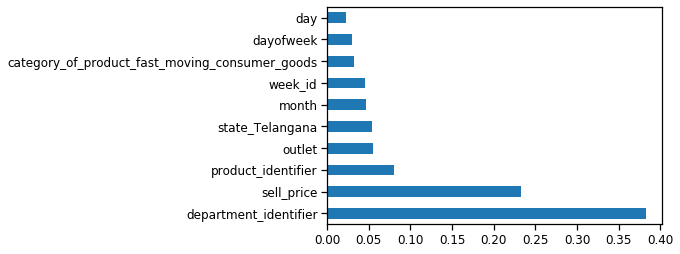

In [273]:
## Plot Importance
%matplotlib inline
f_imp_order.plot(kind='barh')
plt.show()

By the use of xgboost regressor we got department_identifier,sell_price are having more importance

# LGBMRegressor

num_leaves:Maximum tree leaves for base learners

In [263]:
from lightgbm import LGBMRegressor
lgbm= LGBMRegressor(num_leaves=30,n_estimators =400,random_state=0,learning_rate = 0.08,subsample=0.8)
lgbm.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.08, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=400, n_jobs=-1, num_leaves=30, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

num_leaves:This is the main parameter to control the complexity of the tree model. a leaf-wise tree is typically much deeper than a depth-wise tree for a fixed number of leaves

In [389]:
import time
#from sklearn.metrics import recall_score
start_time = time.time()
y_train_pred_lgbm = lgbm.predict(X_train)
y_valid_pred_lgbm = lgbm.predict(X_valid)
print("--- %s seconds ---" % (time.time() - start_time))
ErrorMetrics(y_train,y_train_pred_lgbm,y_valid,y_valid_pred_lgbm)

--- 4.416245937347412 seconds ---
-----Train Error------
SSE: 2.2205629561946045
RMSE: 1.4901553463295714
MAE: 0.8743494367195646
-----Validation Error------
SSE: 2.2106043606626065
RMSE: 1.4868101293247253
MAE: 0.8718988681452419


In [265]:
r2_score(y_valid, y_valid_pred_lgbm)

0.5629322345413614

([1.6931078844012968,
  1.9516028120263997,
  2.035933422205003,
  2.1234001500672717,
  2.1620508082008785,
  2.162628006721619,
  2.1801444182891605,
  2.213275979496663,
  2.207113483706183,
  2.198986392727762],
 [2.6599981887958517,
  2.4908600918637314,
  2.4144945752678395,
  2.388762809960661,
  2.3645051702966184,
  2.335973527377003,
  2.3312216334774276,
  2.327547824861242,
  2.3178307183260682,
  2.2969106145299767])

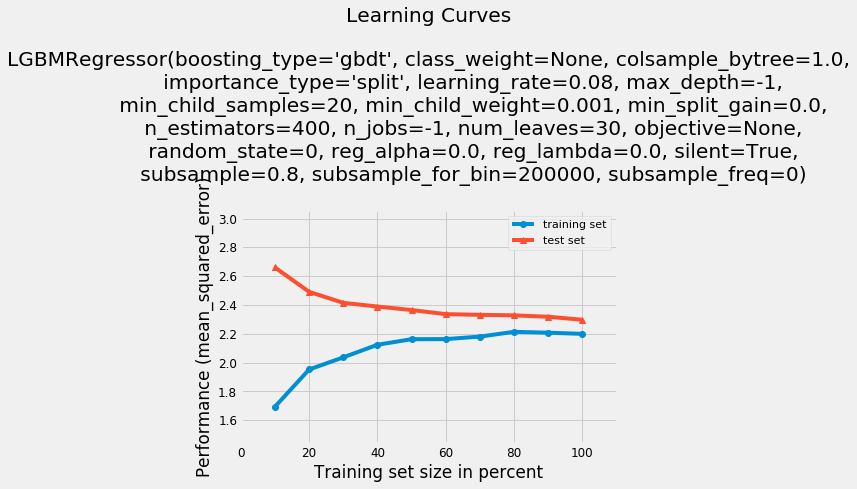

In [296]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_valid, y_valid, lgbm, scoring='mean_squared_error')

# RandomForestRegressor

In [198]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfc=RandomForestRegressor(random_state=42)
param_grid = { 
    'n_estimators': [80,100,150],
    'max_depth' : [18,20,25,30]
    
}
# Create grid search object
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,verbose=10,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 56.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 67.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 77.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 77.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [18, 20, 25, 30],
    

In [199]:
CV_rfc.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [200]:
CV_rfc.best_params_

{'max_depth': 18, 'n_estimators': 150}

In [201]:
rf_predict_train=CV_rfc.best_estimator_.predict(X_train)
rf_predict_valid=CV_rfc.best_estimator_.predict(X_valid)
ErrorMetrics(y_train,rf_predict_train,y_valid,rf_predict_valid)

-----Train Error------
SSE: 1.097170163112515
RMSE: 1.047458907600921
MAE: 0.6056102053617671
-----Validation Error------
SSE: 2.2248327849193363
RMSE: 1.4915873373421136
MAE: 0.8328569757371693


In [250]:
r2_score(y_valid, rf_predict_valid)

ValueError: DataFrame constructor not properly called!

# models after removed variables

In [390]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train_drop,y_train_drop)
y_pred_train_drop=reg.predict(X_train_drop)
y_pred_valid_drop=reg.predict(X_valid_drop)
ErrorMetrics(y_train_drop,y_pred_train_drop,y_valid_drop,y_pred_valid_drop)

-----Train Error------
SSE: 4.738289699415322
RMSE: 2.176761286732039
MAE: 1.3318461521828404
-----Validation Error------
SSE: 4.758036651042905
RMSE: 2.1812924267605442
MAE: 1.3332945498440312


In [391]:
from lightgbm import LGBMRegressor
lgbm_drop= LGBMRegressor(num_leaves=50,n_estimators =400,random_state=0,learning_rate = 0.1,subsample=0.7)
lgbm_drop.fit(X_train_drop,y_train_drop)
y_train_pred_lgbm_drop = lgbm_drop.predict(X_train_drop)
y_valid_pred_lgbm_drop = lgbm_drop.predict(X_valid_drop)
ErrorMetrics(y_train_drop,y_train_pred_lgbm_drop,y_valid_drop,y_valid_pred_lgbm_drop)

-----Train Error------
SSE: 2.169271139416819
RMSE: 1.4728445740867633
MAE: 0.8743993715256345
-----Validation Error------
SSE: 2.441607681085252
RMSE: 1.562564456617791
MAE: 0.9098251387549714


In [231]:
from xgboost import XGBRegressor
xgb_drop = XGBRegressor(n_estimators=300, learning_rate=0.07, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_drop.fit(X_train_drop,y_train_drop)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.07, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75, tree_method=None,
             validate_parameters=False, verbosity=None)

In [392]:
y_train_pred_xgbm_drop = xgb_drop.predict(X_train_drop)
y_valid_pred_xgbm_drop = xgb_drop.predict(X_valid_drop)
ErrorMetrics(y_train_drop,y_train_pred_xgbm_drop,y_valid_drop,y_valid_pred_xgbm_drop)

-----Train Error------
SSE: 2.294851211942706
RMSE: 1.5148766325819096
MAE: 0.8920211387859492
-----Validation Error------
SSE: 2.3052507678176797
RMSE: 1.5183052288053545
MAE: 0.8935467128863063


# Models without Clipped outliers 

Linear_Model

In [393]:
reg=LinearRegression()
reg.fit(X_train_reg,y_train_reg)
y_pred_train=reg.predict(X_train_reg)
y_pred_valid=reg.predict(X_valid_reg)
ErrorMetrics(y_train_reg,y_pred_train,y_valid_reg,y_pred_valid)

-----Train Error------
SSE: 5.975874601655881
RMSE: 2.444560206183493
MAE: 1.3972635480109084
-----Validation Error------
SSE: 5.951899566516668
RMSE: 2.439651525631615
MAE: 1.3923007992267187


[MAE] ≤ [RMSE]. The RMSE result will always be larger or equal to the MAE. If all of the errors have the same magnitude, then RMSE=MAE

# XGBoost

In [131]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=300, learning_rate=0.07, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7,random_state=42)
xgb.fit(X_train_reg,y_train_reg)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.07, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75, tree_method=None,
             validate_parameters=False, verbosity=None)

In [394]:
y_pred_xgb_train=xgb.predict(X_train_reg)
y_pred_xgb_valid=xgb.predict(X_valid_reg)
ErrorMetrics(y_train_reg,y_pred_xgb_train,y_valid_reg,y_pred_xgb_valid)

-----Train Error------
SSE: 2.76251250517752
RMSE: 1.662080775767989
MAE: 0.8870939577956555
-----Validation Error------
SSE: 2.67706147304352
RMSE: 1.6361728127076065
MAE: 0.8799068673449226


In [133]:
print('rsquare:',r2_score(y_valid, y_pred_xgb_valid))

rsquare: -1.2646441194468694


# LGBMRegressor

In [238]:
from lightgbm import LGBMRegressor
lgbm= LGBMRegressor(num_leaves=30,n_estimators =400,random_state=0,learning_rate = 0.08,subsample=0.8)
lgbm.fit(X_train_reg,y_train_reg)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.08, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=400, n_jobs=-1, num_leaves=30, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [395]:
start_time = time.time()
y_train_pred_lgbm = lgbm.predict(X_train_reg)
y_valid_pred_lgbm = lgbm.predict(X_valid_reg)
print("--- %s seconds ---" % (time.time() - start_time))
ErrorMetrics(y_train_reg,y_train_pred_lgbm,y_valid_reg,y_valid_pred_lgbm)

--- 4.317481994628906 seconds ---
-----Train Error------
SSE: 2.9031331593095726
RMSE: 1.70385831550325
MAE: 0.9180471307780342
-----Validation Error------
SSE: 2.834988599288898
RMSE: 1.6837424385246391
MAE: 0.9127378477559475


In [396]:
print('rsquare:',r2_score(y_valid, y_valid_pred_lgbm))

rsquare: -0.5070048877585684


Note:

After Removing The Outliers on the target variables .the model perfomance increases compare to original data.So better to tune these outliers removed models to get more accuracy.it will helpful for future test point to predict more accuratly.

In [165]:
full_data_test.head()

,id,date,department_identifier,category_of_product,state,outlet,product_identifier,week_id,sell_price
0,1,2014-03-01,11,others,Maharashtra,111,74,162,3.43
1,2,2014-03-01,11,others,Maharashtra,111,337,162,7.78
2,3,2014-03-01,12,others,Maharashtra,111,423,162,0.97
3,4,2014-03-01,12,others,Maharashtra,111,432,162,4.97
4,5,2014-03-01,21,fast_moving_consumer_goods,Maharashtra,111,581,162,4.88


# sqrt transformation applied on our target variable 

#LGBMRegressor

In [397]:
from lightgbm import LGBMRegressor
lgbm_sqrt= LGBMRegressor(num_leaves=30,n_estimators =400,random_state=0,learning_rate = 0.08,subsample=0.8)
lgbm_sqrt.fit(X_train_sqrt,y_train_sqrt)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.08, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=400, n_jobs=-1, num_leaves=30, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [398]:
start_time = time.time()
y_train_pred_lgbm_sqrt = lgbm_sqrt.predict(X_train_sqrt)
y_valid_pred_lgbm_sqrt = lgbm_sqrt.predict(X_valid_sqrt)
print("--- %s seconds ---" % (time.time() - start_time))
ErrorMetrics(y_train_sqrt,y_train_pred_lgbm_sqrt,y_valid_sqrt,y_valid_pred_lgbm_sqrt)

--- 4.045812606811523 seconds ---
-----Train Error------
SSE: 0.36969496707345767
RMSE: 0.608025465809992
MAE: 0.45596664653598
-----Validation Error------
SSE: 0.38143035667732067
RMSE: 0.6176004830611135
MAE: 0.46183432481673126


In [399]:
from xgboost import XGBRegressor
xgb_sqrt = XGBRegressor(n_estimators=300, learning_rate=0.07, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7,random_state=42)
xgb_sqrt.fit(X_train_sqrt,y_train_sqrt)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.07, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75, tree_method=None,
             validate_parameters=False, verbosity=None)

In [411]:
start_time = time.time()
y_train_pred_xgbm_sqrt = xgb_sqrt.predict(X_train_sqrt)
y_valid_pred_xgbm_sqrt = xgb_sqrt.predict(X_valid_sqrt)
print("--- %s seconds ---" % (time.time() - start_time))
ErrorMetrics(y_train_sqrt,y_train_pred_xgbm_sqrt,y_valid_sqrt,y_valid_pred_xgbm_sqrt)

--- 5.696150302886963 seconds ---
-----Train Error------
SSE: 0.34954088422307905
RMSE: 0.5912198273257411
MAE: 0.4388602804869103
-----Validation Error------
SSE: 0.37385091159838113
RMSE: 0.6114334891044005
MAE: 0.45137264431153645


# On scaled data Prediction

LinearRegression

In [401]:
from sklearn.linear_model import LinearRegression
reg_scale=LinearRegression()
reg_scale.fit(X_train_scale,y_train_scale)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [402]:
y_pred_train_scale=reg.predict(X_train_scale)
y_pred_valid_scale=reg.predict(X_valid_scale)

In [403]:
ErrorMetrics(y_train_scale,y_pred_train_scale,y_valid_scale,y_pred_valid_scale)

-----Train Error------
SSE: 3.6355651718756077
RMSE: 1.906715807842272
MAE: 1.7433420694077228
-----Validation Error------
SSE: 3.654469301493333
RMSE: 1.9116666292775353
MAE: 1.74653029692665


# KNeighborsRegressor using GridSearchCV

In [412]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
grid_params ={
    'n_neighbors':[23,25,30,40],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','minkowski']
}
gs_results_scale=GridSearchCV(KNeighborsRegressor(),grid_params,verbose=10,cv=5,n_jobs=-1)
gs_results_scale.fit(X_train_scale,y_train_scale)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [23, 25, 30, 40],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [413]:
gs_results_scale.best_params_

{'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'uniform'}

In [414]:
gs_results_scale.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')

In [415]:
gs_results_scale.best_score_

0.454349724021687

In [416]:
knn_predict_train_scale=gs_results_scale.best_estimator_.predict(X_train_scale)
knn_predict_valid_scale=gs_results_scale.best_estimator_.predict(X_valid_scale)

In [417]:
ErrorMetrics(y_train_scale,knn_predict_train_scale,y_valid_scale,knn_predict_valid_scale)

-----Train Error------
SSE: 0.49861890254352764
RMSE: 0.7061295224981942
MAE: 0.3672414613007827
-----Validation Error------
SSE: 0.554879371017319
RMSE: 0.7449022560157266
MAE: 0.38809102341559304


# XGBRegressor on scaled data

In [406]:
from xgboost import XGBRegressor
xgb_scale = XGBRegressor(n_estimators=300, learning_rate=0.07, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7,random_state=42)
xgb_scale.fit(X_train_scale,y_train_scale)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.07, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75, tree_method=None,
             validate_parameters=False, verbosity=None)

In [407]:
y_pred_xgb_train_scale=xgb.predict(X_train_scale)
y_pred_xgb_valid_scale=xgb.predict(X_valid_scale)
ErrorMetrics(y_train_scale,y_pred_xgb_train_scale,y_valid_scale,y_pred_xgb_valid_scale)

-----Train Error------
SSE: 24.889878421667333
RMSE: 4.988975688622599
MAE: 3.8494622781818535
-----Validation Error------
SSE: 24.75641243501477
RMSE: 4.975581617762367
MAE: 3.8416741902786344


In [408]:
print('rsquare:',r2_score(y_valid, y_pred_xgb_valid_scale))#worest results

rsquare: -3.6739183726246445


# lgbm on  scaled data

In [409]:
from lightgbm import LGBMRegressor
lgbm_scale= LGBMRegressor(num_leaves=30,n_estimators =400,random_state=0,learning_rate = 0.09,subsample=0.8)
lgbm_scale.fit(X_train_scale,y_train_scale)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.09, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=400, n_jobs=-1, num_leaves=30, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [410]:
import time
start_time = time.time()
y_train_pred_lgbm_scale = lgbm_scale.predict(X_train_scale)
y_valid_pred_lgbm_scale = lgbm_scale.predict(X_valid_scale)
print("--- %s seconds ---" % (time.time() - start_time))
ErrorMetrics(y_train_scale,y_train_pred_lgbm_scale,y_valid_scale,y_valid_pred_lgbm_scale)

--- 4.7681825160980225 seconds ---
-----Train Error------
SSE: 0.3932291649483862
RMSE: 0.6270798712671187
MAE: 0.34742585697421885
-----Validation Error------
SSE: 0.4456514393600585
RMSE: 0.66757129908352
MAE: 0.361002066348123


# test preprocessing

In [29]:
test=full_data_test.copy()
test.drop(['id'],axis=1,inplace=True)

In [30]:
test_scale=test.copy()

In [31]:
test.head()

,date,department_identifier,category_of_product,state,outlet,product_identifier,week_id,sell_price
0,2014-03-01,11,others,Maharashtra,111,74,162,3.43
1,2014-03-01,11,others,Maharashtra,111,337,162,7.78
2,2014-03-01,12,others,Maharashtra,111,423,162,0.97
3,2014-03-01,12,others,Maharashtra,111,432,162,4.97
4,2014-03-01,21,fast_moving_consumer_goods,Maharashtra,111,581,162,4.88


In [32]:
test['date']=pd.to_datetime(test['date'])
test['month']=test['date'].dt.month
test['day']=test['date'].dt.day
test['dayofweek']=test['date'].dt.dayofweek
test['year']=test['date'].dt.year
test['quarter']=test['date'].dt.quarter
test.head()

,date,department_identifier,category_of_product,state,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter
0,2014-03-01,11,others,Maharashtra,111,74,162,3.43,3,1,5,2014,1
1,2014-03-01,11,others,Maharashtra,111,337,162,7.78,3,1,5,2014,1
2,2014-03-01,12,others,Maharashtra,111,423,162,0.97,3,1,5,2014,1
3,2014-03-01,12,others,Maharashtra,111,432,162,4.97,3,1,5,2014,1
4,2014-03-01,21,fast_moving_consumer_goods,Maharashtra,111,581,162,4.88,3,1,5,2014,1


In [33]:
test.to_csv(r'C:/Users/Riyansika/Desktop/mith exam/mith time series/test.csv')

In [216]:
test = pd.get_dummies(data=test, columns=['category_of_product', 'state'], drop_first=True)
test.head()

,date,department_identifier,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Maharashtra,state_Telangana
0,2014-03-01,11,111,74,162,3.43,3,1,5,2014,1,0,1,1,0
1,2014-03-01,11,111,337,162,7.78,3,1,5,2014,1,0,1,1,0
2,2014-03-01,12,111,423,162,0.97,3,1,5,2014,1,0,1,1,0
3,2014-03-01,12,111,432,162,4.97,3,1,5,2014,1,0,1,1,0
4,2014-03-01,21,111,581,162,4.88,3,1,5,2014,1,1,0,1,0


In [217]:
test.drop(['date'],axis=1,inplace=True)

In [218]:
test.columns==X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
#among all xgb giving less error
y_pred_xgb_test=xgb.predict(test)
y_pred_xgb_test

In [278]:
y_train

,sales
238520,1
386911,0
336518,0
75765,2
148490,2
...,...
88469,1
133709,0
2750,0
23211,0


# using best models from the above. predictions made on test data

In [276]:
y_pred_lgbm_test=lgbm.predict(test)
y_pred_lgbm_test

array([0.57081581, 1.80840865, 1.34657168, ..., 1.48127131, 1.28891464,
       0.39987936])

In [280]:

sub_data={'id':test_id,
          'sales':y_pred_lgbm_test}
sub=pd.DataFrame(sub_data,columns=['id','sales'])
#sub.to_csv('C:\Users\Riyansika\Desktop\mith exam\submission\submission1.csv',index=False)
sub.to_csv (r'C:\Users\Riyansika\Desktop\mith exam\submission\submission1.csv', index=False)

In [287]:
y_pred_xgb_test=xgb.predict(test)

In [289]:
sub_data1={'id':test_id,
          'sales':y_pred_xgb_test}
sub1=pd.DataFrame(sub_data1,columns=['id','sales'])
sub1.to_csv (r'C:\Users\Riyansika\Desktop\mith exam\submission\xgbsubmission2.csv', index=False)

In [298]:
rf_predict_test=CV_rfc.best_estimator_.predict(test)

In [302]:
sub_data3={'id':test_id,
          'sales':rf_predict_test}
sub3=pd.DataFrame(sub_data3,columns=['id','sales'])
sub3.to_csv (r'C:\Users\Riyansika\Desktop\mith exam\submission\rfcsubmission3.csv', index=False)

In [331]:
y_test_pred_xgbm_sqrt = xgb_sqrt.predict(test)

In [332]:
sub_data5={'id':test_id,
          'sales':y_test_pred_xgbm_sqrt}
sub5=pd.DataFrame(sub_data5,columns=['id','sales'])
sub5.to_csv (r'C:\Users\Riyansika\Desktop\mith exam\submission\lgbmsqrtsubmission.csv', index=False)

# Scaling on testdata

In [295]:
test_scale=test.copy()
num_col=['sell_price']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_scale[num_col])
test_scale[num_col] = scaler.transform(test_scale[num_col])
test_scale.head()

,department_identifier,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Maharashtra,state_Telangana
0,11,111,74,162,-0.401651,3,1,5,2014,1,0,1,1,0
1,11,111,337,162,0.719609,3,1,5,2014,1,0,1,1,0
2,12,111,423,162,-1.035742,3,1,5,2014,1,0,1,1,0
3,12,111,432,162,-0.004699,3,1,5,2014,1,0,1,1,0
4,21,111,581,162,-0.027897,3,1,5,2014,1,1,0,1,0


In [296]:
knn_predict_test_scale=gs_results_scale.best_estimator_.predict(test_scale)

In [297]:
sub_data2={'id':test_id,
          'sales':knn_predict_test_scale}
sub2=pd.DataFrame(sub_data2,columns=['id','sales'])
sub2.to_csv (r'C:\Users\Riyansika\Desktop\mith exam\submission\knnsubmission.csv', index=False)

In [234]:
#y_test_pred_lgbm_scale = lgbm_scale.predict(test_scale)
y_test_pred_xgm_scale = xgb_drop.predict(test_drop)



In [333]:
sub_data4={'id':test_id,
          'sales':y_test_pred_lgbm_scale}
sub4=pd.DataFrame(sub_data4,columns=['id','sales'])
sub4.to_csv (r'C:\Users\Riyansika\Desktop\mith exam\submission\lgbmscalesubmission.csv', index=False)

In [235]:
sub_data4={'id':test_id,
          'sales':y_test_pred_xgm_scale}
sub4=pd.DataFrame(sub_data4,columns=['id','sales'])
sub4.to_csv (r'C:\Users\Riyansika\Desktop\mith exam\submission\xgbdropsubmission.csv', index=False)

### removing variables on test data which are highly correlated

In [222]:
test_drop=test.copy()

In [224]:
test_drop.drop(col,axis=1,inplace=True)

In [228]:
y_test_pred_lgbm_drop=lgbm_drop.predict(test_drop)

In [229]:
sub_data4={'id':test_id,
          'sales':y_test_pred_lgbm_drop}
sub4=pd.DataFrame(sub_data4,columns=['id','sales'])
sub4.to_csv (r'C:\Users\Riyansika\Desktop\mith exam\submission\lgbmdropscalesubmission.csv', index=False)

In [418]:
import numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

scores = pd.DataFrame(columns=['Model','train_mse','test_mse','train_rmse','test_rmse','train_mae','test_mae','rsquare'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    
    train_mse   = mean_squared_error(train_actual,train_predicted)
    test_mse   = mean_squared_error(test_actual,test_predicted)
    train_rmse   = np.sqrt(mean_squared_error(train_actual,train_predicted))
    test_rmse   = np.sqrt(mean_squared_error(test_actual,test_predicted))
    train_mae  = mean_absolute_error(train_actual,train_predicted)
    test_mae   = mean_absolute_error(test_actual,test_predicted)
    score   = r2_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description,train_mse,
                                            test_mse,train_rmse,test_rmse,train_mae,test_mae,score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [419]:
scores = get_metrics(y_train,y_pred_train,y_valid,y_pred_valid,'linear basic model with clipped',scores)
scores = get_metrics(y_train,y_pred_train_ridge,y_valid,y_pred_valid_ridge,'Regressor model with clipped',scores)
scores = get_metrics(y_train,y_pred_knn_train,y_valid,y_pred_knn_valid,'knn model  with clipped',scores)
scores = get_metrics(y_train,y_pred_xgb_train,y_valid,y_pred_xgb_valid,' XGBRegressor model  with clipped',scores)
scores = get_metrics(y_train,y_train_pred_lgbm,y_valid,y_valid_pred_lgbm,'LGBRegressor model  with clipped',scores)
scores = get_metrics(y_train,y_pred_train_drop,y_valid,y_pred_valid_drop,'linear model with clipped after variables drop',scores)
scores = get_metrics(y_train_drop,y_train_pred_lgbm_drop,y_valid_drop,y_valid_pred_lgbm_drop,' LGBM with clipped after variables drop',scores)
scores = get_metrics(y_train_drop,y_train_pred_xgbm_drop,y_valid_drop,y_valid_pred_xgbm_drop,' XGBM with clipped after variables drop',scores)
scores = get_metrics(y_train_reg,y_pred_train,y_valid_reg,y_pred_valid,'linear basic model without clipped',scores)
scores = get_metrics(y_train_reg,y_pred_xgb_train,y_valid_reg,y_pred_xgb_valid,'XGB model without clipped',scores)
scores = get_metrics(y_train_reg,y_train_pred_lgbm,y_valid_reg,y_valid_pred_lgbm,'LGBM model without clipped',scores)
scores = get_metrics(y_train_sqrt,y_train_pred_lgbm_sqrt,y_valid_sqrt,y_valid_pred_lgbm_sqrt,'LGBM model transformation(sqrt) applied on target',scores)
scores = get_metrics(y_train_sqrt,y_train_pred_xgbm_sqrt,y_valid_sqrt,y_valid_pred_xgbm_sqrt,'XGB model transformation(sqrt) applied on target',scores)
scores = get_metrics(y_train_scale,y_pred_train_scale,y_valid_scale,y_pred_valid_scale,'linear model on scaled ',scores)
scores = get_metrics(y_train_scale,y_pred_xgb_train_scale,y_valid_scale,y_pred_xgb_valid_scale,'XGB model on scaled ',scores)
scores = get_metrics(y_train_scale,y_train_pred_lgbm_scale,y_valid_scale,y_valid_pred_lgbm_scale,'LGBM model on scaled ',scores)
scores = get_metrics(y_train_scale,knn_predict_train_scale,y_valid_scale,knn_predict_valid_scale,'KNeighborsRegressor using GridSearchCV on scaled ',scores)






In [420]:
scores

,Model,train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,rsquare
0,linear basic model with clipped,6.150756,6.168463,2.480072,2.483639,1.582894,1.580846,-0.141413
1,Regressor model with clipped,4.773609,4.808728,2.184859,2.192881,1.334637,1.337024,0.110192
2,knn model with clipped,1.739789,3.394204,1.319011,1.842337,0.684408,0.974831,0.371936
3,XGBRegressor model with clipped,8.445439,8.488703,2.906104,2.913538,1.676505,1.677185,-0.570750
4,LGBRegressor model with clipped,8.133581,8.144207,2.851943,2.853806,1.651463,1.649142,-0.507005
5,linear model with clipped after variables drop,6.031890,6.057049,2.455991,2.461107,1.546841,1.544431,-0.120797
6,LGBM with clipped after variables drop,2.169271,2.441608,1.472845,1.562564,0.874399,0.909825,0.549499
7,XGBM with clipped after variables drop,2.294851,2.305251,1.514877,1.518305,0.892021,0.893547,0.574658
8,linear basic model without clipped,5.975875,5.951900,2.444560,2.439652,1.397264,1.392301,0.113636
9,XGB model without clipped,2.762513,2.677061,1.662081,1.636173,0.887094,0.879907,0.601329


# Time Series Analysis

In [61]:
import pandas as pd
data=pd.read_csv('C:\\Users\\Riyansika\\Desktop\\mith exam\\mith time series\\data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395000 entries, 0 to 394999
Data columns (total 15 columns):
Unnamed: 0               395000 non-null int64
date                     395000 non-null object
department_identifier    395000 non-null int64
category_of_product      395000 non-null object
state                    395000 non-null object
sales                    395000 non-null int64
outlet                   395000 non-null int64
product_identifier       395000 non-null int64
week_id                  395000 non-null int64
sell_price               395000 non-null float64
month                    395000 non-null int64
day                      395000 non-null int64
dayofweek                395000 non-null int64
year                     395000 non-null int64
quarter                  395000 non-null int64
dtypes: float64(1), int64(11), object(3)
memory usage: 45.2+ MB


In [62]:
col=['Unnamed: 0','month','day','dayofweek','year','quarter']
data.drop(col,inplace=True,axis=1)

In [63]:
data.date=pd.to_datetime(data.date)

In [64]:
data.date.min(),data.date.max()

(Timestamp('2012-01-01 00:00:00'), Timestamp('2014-02-28 00:00:00'))

In [65]:
index = pd.date_range('2012-01-01','2014-02-28')
index= pd.DataFrame(index,columns=['date'])
df= data.merge(index,on='date',how='left')
df.head()

,date,department_identifier,category_of_product,state,sales,outlet,product_identifier,week_id,sell_price
0,2012-01-01,11,others,Maharashtra,0,111,74,49,2.94
1,2012-01-01,11,others,Maharashtra,1,111,337,49,7.44
2,2012-01-01,12,others,Maharashtra,0,111,423,49,0.97
3,2012-01-01,12,others,Maharashtra,0,111,432,49,4.97
4,2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,581,49,4.88


In [66]:
df.isna().sum()

date                     0
department_identifier    0
category_of_product      0
state                    0
sales                    0
outlet                   0
product_identifier       0
week_id                  0
sell_price               0
dtype: int64

In [67]:
df.date=pd.to_datetime(df.date)

In [68]:
ts = df.set_index('date')
ts

,department_identifier,category_of_product,state,sales,outlet,product_identifier,week_id,sell_price
date,,,,,,,,
2012-01-01,11,others,Maharashtra,0,111,74,49,2.94
2012-01-01,11,others,Maharashtra,1,111,337,49,7.44
2012-01-01,12,others,Maharashtra,0,111,423,49,0.97
2012-01-01,12,others,Maharashtra,0,111,432,49,4.97
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,581,49,4.88
...,...,...,...,...,...,...,...,...
2014-02-28,33,drinks_and_food,Kerala,2,333,2932,161,2.78
2014-02-28,33,drinks_and_food,Kerala,8,333,2935,161,0.20
2014-02-28,33,drinks_and_food,Kerala,0,333,3004,161,2.50


In [43]:
print(df.shape)
df.head()

(790, 6)


,department_identifier,sales,outlet,product_identifier,week_id,sell_price
date,,,,,,
2012-01-01,24.46,1.308,211.2,1509.96,49.0,4.94466
2012-01-02,24.46,1.720,211.2,1509.96,49.0,4.94466
2012-01-03,24.46,1.242,211.2,1509.96,49.0,4.94466
2012-01-04,24.46,1.394,211.2,1509.96,49.0,4.94466
2012-01-05,24.46,1.364,211.2,1509.96,49.0,4.94466


In [6]:
print(data_month.shape)
data_month.head()


(26, 6)


,department_identifier,sales,outlet,product_identifier,week_id,sell_price
date,,,,,,
2012-01-31,24.46,1.328903,211.2,1509.96,50.870968,4.941965
2012-02-29,24.46,1.341034,211.2,1509.96,55.137931,4.948632
2012-03-31,24.46,1.116774,211.2,1509.96,59.419355,4.960670
2012-04-30,24.46,1.178533,211.2,1509.96,63.800000,4.946014
2012-05-31,24.46,1.298194,211.2,1509.96,68.129032,4.942257


In [7]:
print(data_year.shape)
data_year.head()

(3, 6)


,department_identifier,sales,outlet,product_identifier,week_id,sell_price
date,,,,,,
2012-12-31,24.46,1.319940,211.2,1509.96,74.786885,4.962841
2013-12-31,24.46,1.148285,211.2,1509.96,127.000000,5.015073
2014-12-31,24.46,1.163119,211.2,1509.96,157.271186,4.971812


In [8]:
print(data_Q.shape)
data_Q.head()

(9, 6)


,department_identifier,sales,outlet,product_identifier,week_id,sell_price
date,,,,,,
2012-03-31,24.46,1.260505,211.2,1509.96,55.142857,4.950462
2012-06-30,24.46,1.346000,211.2,1509.96,68.142857,4.947993
2012-09-30,24.46,1.425457,211.2,1509.96,81.217391,4.976767
2012-12-31,24.46,1.247435,211.2,1509.96,94.358696,4.975845
2013-03-31,24.46,1.130800,211.2,1509.96,107.355556,5.016858


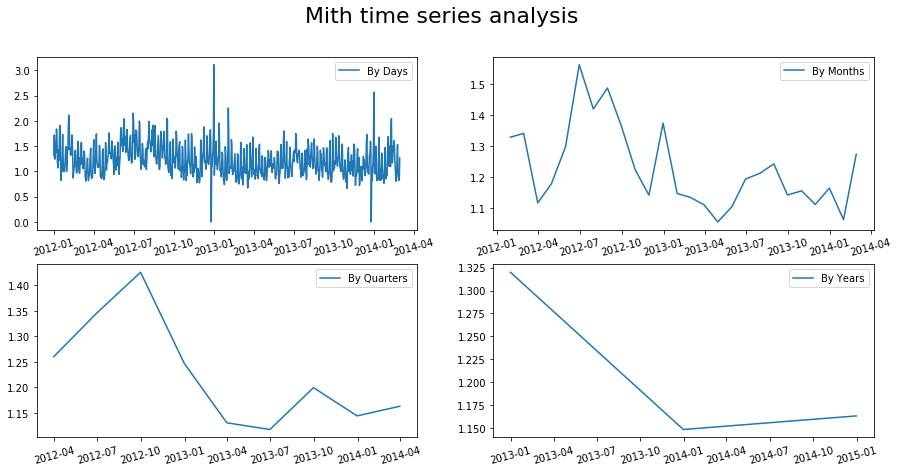

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Mith time series analysis', fontsize=22)

plt.subplot(221)
plt.plot(data.sales, '-', label='By Days')
plt.xticks(rotation=15)

plt.legend()

plt.subplot(222)
plt.plot(data_month.sales, '-', label='By Months')
plt.xticks(rotation=15)

plt.legend()

plt.subplot(223)
plt.plot(data_Q.sales, '-', label='By Quarters')
plt.xticks(rotation=15)

plt.legend()

plt.subplot(224)
plt.plot(data_year.sales, '-', label='By Years')
plt.xticks(rotation=15)

plt.legend()

# plt.tight_layout()
plt.show()


# month wise

Dickey–Fuller test: p=0.082091


<Figure size 1080x504 with 0 Axes>

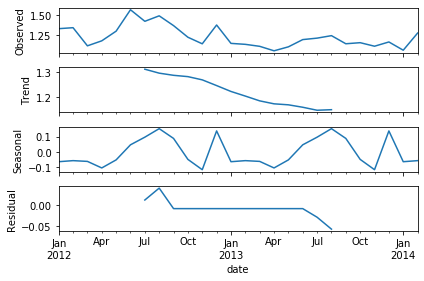

In [12]:
import statsmodels.api as sm
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(data_month.sales).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data_month.sales)[1])
plt.show()

# Quater

Dickey–Fuller test: p=0.426114


<Figure size 1080x504 with 0 Axes>

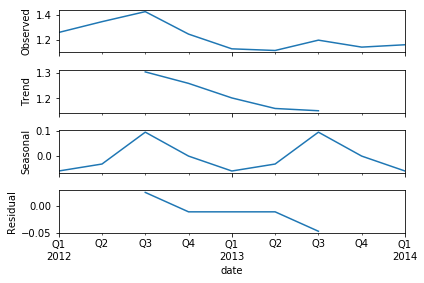

In [13]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(data_Q.sales).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data_Q.sales)[1])
plt.show()

# Day

Dickey–Fuller test: p=0.014321


<Figure size 1080x504 with 0 Axes>

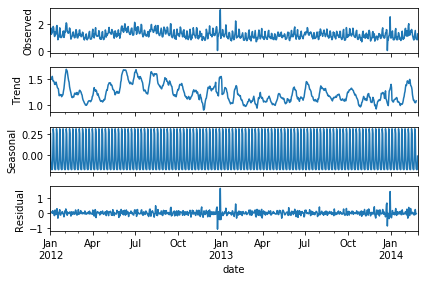

In [14]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(data.sales).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data.sales)[1])
plt.show()

i.p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.


ii.p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

# BoxCox Transformation

In [15]:
from scipy import stats
data_month['sales'], lmbda = stats.boxcox(data_month.sales)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data_month.sales)[1])

Dickey–Fuller test: p=0.049711


In [20]:
data_month.head()

,department_identifier,sales,outlet,product_identifier,week_id,sell_price
date,,,,,,
2012-01-31,24.46,0.178829,211.2,1509.96,50.870968,4.941965
2012-02-29,24.46,0.182078,211.2,1509.96,55.137931,4.948632
2012-03-31,24.46,0.091319,211.2,1509.96,59.419355,4.960670
2012-04-30,24.46,0.124379,211.2,1509.96,63.800000,4.946014
2012-05-31,24.46,0.169969,211.2,1509.96,68.129032,4.942257


In [21]:
data_month.shape

(26, 6)

In [18]:
#from pyramid.arima import auto_arima
import pmdarima as pm

model = pm.auto_arima(data_month, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(data_month)

#forecast = model.predict(n_periods=len(valid))
#forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
#plt.plot(train, label='Train')
#plt.plot(valid, label='Valid')
#plt.plot(forecast, label='Prediction')
#plt.show()

ModuleNotFoundError: No module named 'pmdarima'

In [157]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data_month, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

ModuleNotFoundError: No module named 'pyramid.arima'

# time series analysis based on individual catogories

In [59]:
full_data_train.head()

,date,department_identifier,category_of_product,state,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter
0,2012-01-01,11,others,Maharashtra,0,111,74,49,2.94,1,1,6,2012,1
1,2012-01-01,11,others,Maharashtra,1,111,337,49,7.44,1,1,6,2012,1
2,2012-01-01,12,others,Maharashtra,0,111,423,49,0.97,1,1,6,2012,1
3,2012-01-01,12,others,Maharashtra,0,111,432,49,4.97,1,1,6,2012,1
4,2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,581,49,4.88,1,1,6,2012,1


In [56]:
others=exp_train[exp_train['category_of_product']=='others']
fmcg=exp_train[exp_train['category_of_product']=='fast_moving_consumer_goods']
dg=exp_train[exp_train['category_of_product']=='drinks_and_goods']
others['sales']=others['sales'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [58]:
train

,date,department_identifier,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Maharashtra,state_Telangana
0,2012-01-01,11,0,111,74,49,2.94,1,1,6,2012,1,0,1,1,0
1,2012-01-01,11,1,111,337,49,7.44,1,1,6,2012,1,0,1,1,0
2,2012-01-01,12,0,111,423,49,0.97,1,1,6,2012,1,0,1,1,0
3,2012-01-01,12,0,111,432,49,4.97,1,1,6,2012,1,0,1,1,0
4,2012-01-01,21,0,111,581,49,4.88,1,1,6,2012,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,33,2,333,2932,161,2.78,2,28,4,2014,1,0,0,0,0
394996,2014-02-28,33,8,333,2935,161,0.20,2,28,4,2014,1,0,0,0,0
394997,2014-02-28,33,0,333,3004,161,2.50,2,28,4,2014,1,0,0,0,0
394998,2014-02-28,33,0,333,3008,161,1.98,2,28,4,2014,1,0,0,0,0


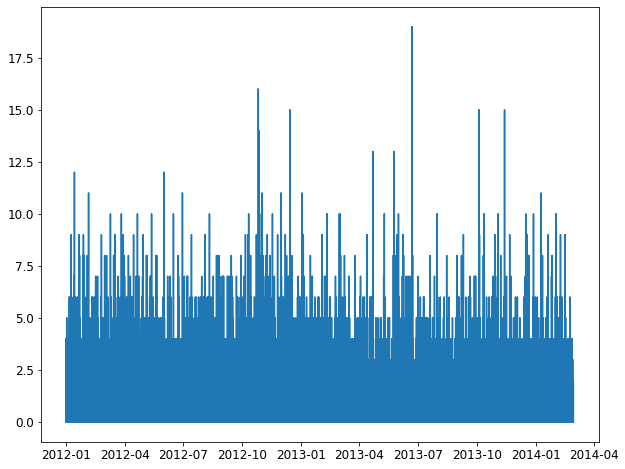

In [241]:
plt.figure(figsize=(10,8))
plt.plot(others.date,others.sales)

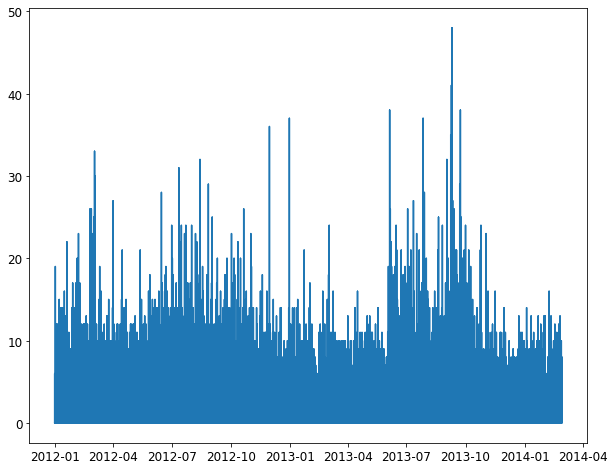

In [242]:
plt.figure(figsize=(10,8))
plt.plot(fmcg.date,fmcg.sales)

# Setting date as index

In [244]:
ts_others = others.set_index('date')
ts_others=pd.DataFrame(ts_others)
ts_others.head()

,department_identifier,category_of_product,state,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter
date,,,,,,,,,,,,,
2012-01-01,11,others,Maharashtra,0.0,111,74,49,2.94,1,1,6,2012,1
2012-01-01,11,others,Maharashtra,1.0,111,337,49,7.44,1,1,6,2012,1
2012-01-01,12,others,Maharashtra,0.0,111,423,49,0.97,1,1,6,2012,1
2012-01-01,12,others,Maharashtra,0.0,111,432,49,4.97,1,1,6,2012,1
2012-01-01,11,others,Maharashtra,0.0,112,74,49,2.94,1,1,6,2012,1


In [245]:
ts_fmcg = fmcg.set_index('date')
ts_fmcg=pd.DataFrame(ts_fmcg)
ts_fmcg.head()

,department_identifier,category_of_product,state,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter
date,,,,,,,,,,,,,
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,581,49,4.88,1,1,6,2012,1
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,611,49,2.84,1,1,6,2012,1
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,631,49,6.97,1,1,6,2012,1
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,659,49,3.97,1,1,6,2012,1
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,743,49,4.47,1,1,6,2012,1


In [246]:
ts_dg = fmcg.set_index('date')
ts_dg=pd.DataFrame(ts_dg)
ts_dg.head()

,department_identifier,category_of_product,state,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter
date,,,,,,,,,,,,,
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,581,49,4.88,1,1,6,2012,1
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,611,49,2.84,1,1,6,2012,1
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,631,49,6.97,1,1,6,2012,1
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,659,49,3.97,1,1,6,2012,1
2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,743,49,4.47,1,1,6,2012,1


In [84]:
ts_others.sales

date
2012-01-01    0.0
2012-01-01    1.0
2012-01-01    0.0
2012-01-01    0.0
2012-01-01    0.0
             ... 
2014-02-28    0.0
2014-02-28    0.0
2014-02-28    2.0
2014-02-28    0.0
2014-02-28    0.0
Name: sales, Length: 31600, dtype: float64

# Decomposing data in level,seasonal,trend

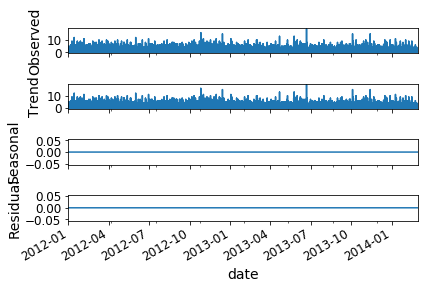

In [247]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_others.sales, model='additive', freq=1)
fig=decomposition.plot()
decomposition

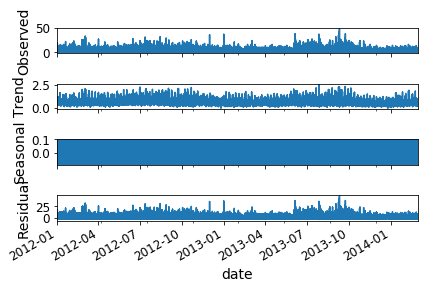

In [250]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_fmcg.sales, model='additive', freq=52)
fig=decomposition.plot()
decomposition

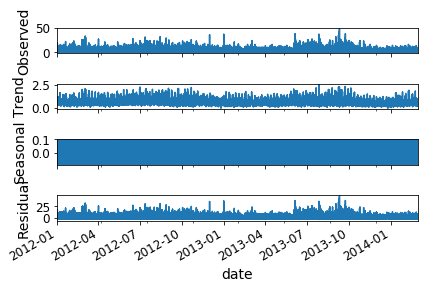

In [251]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_dg.sales, model='additive', freq=52)
fig=decomposition.plot()
decomposition

# ACF,PACF plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


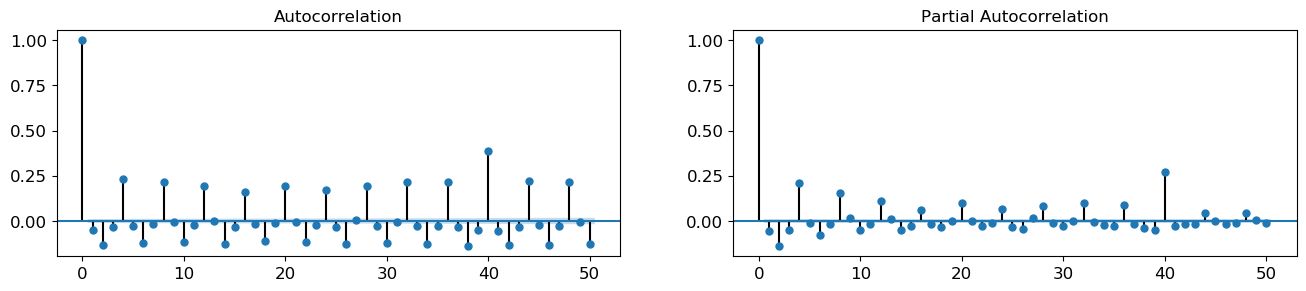

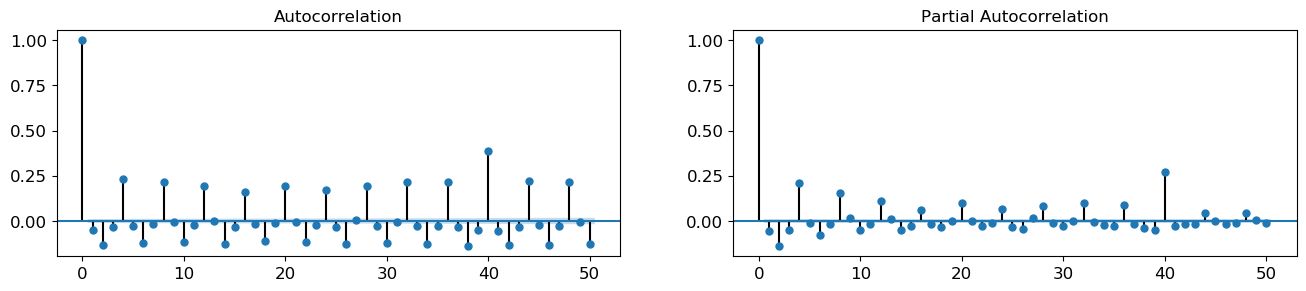

In [300]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
X = ts_others.sales.values
acf_50 = acf(X, nlags=52)
fig, axes = plt.subploats(1,2,figsize=(16,3), dpi= 100)
plot_acf(X.tolist(), lags=50, ax=axes[0])
plot_pacf(X.tolist(), lags=50, ax=axes[1])

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
X = ts_fmcg.sales.values
acf_50 = acf(X, nlags=52)
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(X.tolist(), lags=50, ax=axes[0])
plot_pacf(X.tolist(), lags=50, ax=axes[1])

# I am not finding any seasonal,level,trend ..so i proceded to regression method